<a href="https://colab.research.google.com/github/123Cub123Cub1234/Statistical-Learning-Work/blob/main/STAT_4360_MINI_PROJECT_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
from statsmodels.formula.api import ols
import csv
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.feature_selection import RFE
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import LeaveOneOut, GridSearchCV, cross_val_score
from sklearn.model_selection import train_test_split

In [ ]:
diabetes = pd.read_csv("diabetes.csv")

In [ ]:
# Convert .txt file to .csv
txt_file_path = 'oxygen_saturation.txt'
csv_file_path = 'oxygen_saturation.csv'

try:
    with open(txt_file_path, 'r') as txt_file:
        lines = txt_file.readlines()

        with open(csv_file_path, 'w', newline='') as csv_file:
            csv_writer = csv.writer(csv_file, delimiter=',')

            for line in lines:
                line = line.strip()
                if line:

                    data = line.split('\t')
                    csv_writer.writerow(data)

    print(f'Conversion completed. Data saved to {csv_file_path}')
except FileNotFoundError:
    print(f"File '{txt_file_path}' not found.")
except Exception as e:
    print(f"An error occurred: {str(e)}")

oxygen = pd.read_csv('oxygen_saturation.csv')

Conversion completed. Data saved to oxygen_saturation.csv


In [ ]:
# Question 1

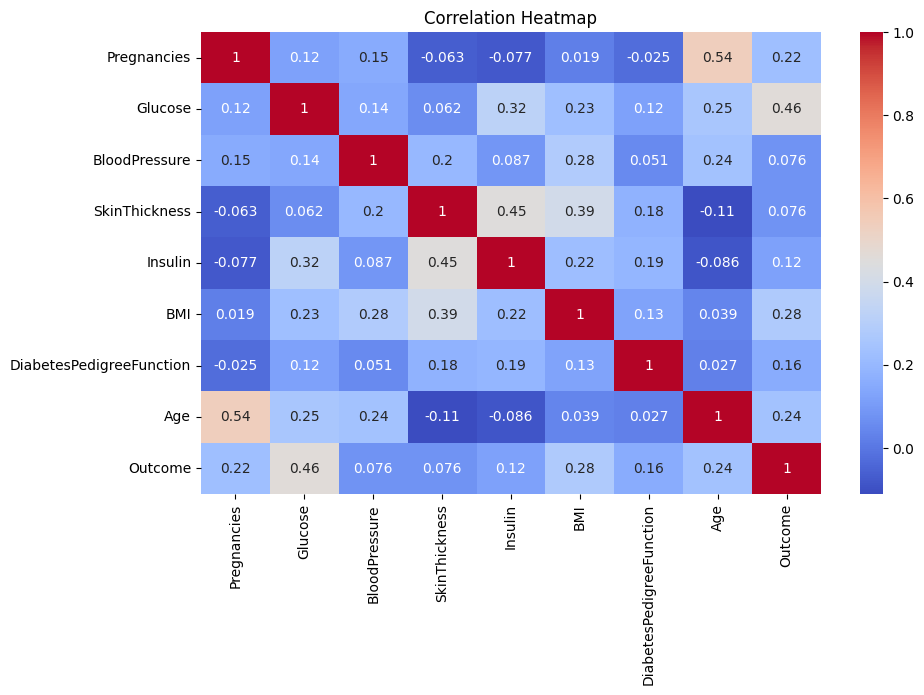

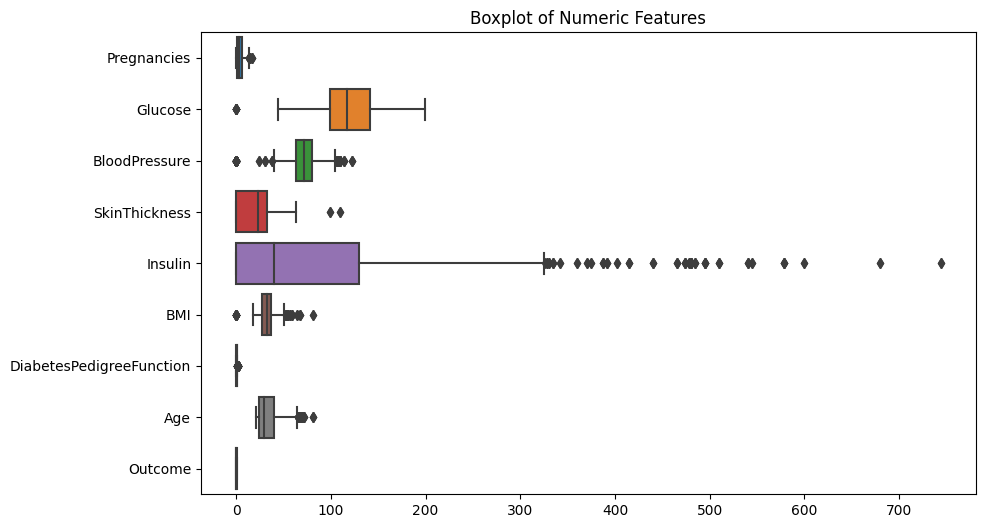

In [ ]:
# Part (A)

diabetes.columns = diabetes.columns.str.replace('\n', '') # Gets rid of the following \n in every column name
diabetes.columns = diabetes.columns.str.replace(' ', '') # Gets rid of the following space in Outcome
diabetes.describe()

# Correlation heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(diabetes.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

# Boxplot to detect outliers
plt.figure(figsize=(10, 6))
sns.boxplot(data=diabetes, orient='h')
plt.title('Boxplot of Numeric Features')
plt.show()

In [ ]:
# Part (B)

# Using all the data to grab only statistically significant parameters

x = diabetes[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']]
y = diabetes['Outcome']

logmodel = LogisticRegression(max_iter=1000)
logmodel.fit(x, y)

x_sm = sm.add_constant(x)
logit_model = sm.Logit(y, x_sm)
result = logit_model.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.478583
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                Outcome   No. Observations:                 2000
Model:                          Logit   Df Residuals:                     1991
Method:                           MLE   Df Model:                            8
Date:                Sun, 22 Oct 2023   Pseudo R-squ.:                  0.2550
Time:                        21:48:22   Log-Likelihood:                -957.17
converged:                       True   LL-Null:                       -1284.7
Covariance Type:            nonrobust   LLR p-value:                3.333e-136
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                       -8.0265      0.431    -18.639      0.000      -8.870

In [ ]:
# Part (B) Continued

# Second part of truly reducing the model by removing the SkinThickness paramter
# SkinThickness could not reject null hypothesis so H0: Beta


x_reduced_train = diabetes[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']]
y_reduced_train = diabetes['Outcome']

logmodel_reduced = LogisticRegression(max_iter=1000)
logmodel_reduced.fit(x_reduced_train, y)

LogisticRegression(max_iter=1000)

In [ ]:
# Part (C) - Final Equation

coefficients = logmodel_reduced.coef_[0]
intercept = logmodel_reduced.intercept_[0]

equation = f'logit(p) = {intercept:.2f} '

for predictor, coefficient in zip(x.columns, coefficients):
    equation += f' + {coefficient:.2f} * {predictor}'

print(equation)

logmodel_try = sm.Logit(y_reduced_train, x_reduced_train)

results = logmodel_try.fit()
std_err = results.bse

y_pred = logmodel_reduced.predict(x)
accuracy = accuracy_score(y, y_pred)

print(results.conf_int())
print(std_err)
print(1 - accuracy)

logit(p) = -8.01  + 0.13 * Pregnancies + 0.03 * Glucose + -0.01 * BloodPressure + 0.00 * SkinThickness + -0.00 * Insulin + 0.08 * BMI + 0.86 * DiabetesPedigreeFunction + 0.01 * Age
Optimization terminated successfully.
         Current function value: 0.609406
         Iterations 5
                                 0         1
Pregnancies               0.098009  0.168458
Glucose                   0.009255  0.015744
BloodPressure            -0.034167 -0.023036
SkinThickness            -0.006813  0.007822
Insulin                  -0.000386  0.001600
BMI                      -0.019325  0.005795
DiabetesPedigreeFunction -0.068837  0.523876
Age                      -0.025639 -0.005210
Pregnancies                 0.017972
Glucose                     0.001655
BloodPressure               0.002840
SkinThickness               0.003734
Insulin                     0.000506
BMI                         0.006408
DiabetesPedigreeFunction    0.151205
Age                         0.005211
dtype: float64
0

In [ ]:
# Question 2

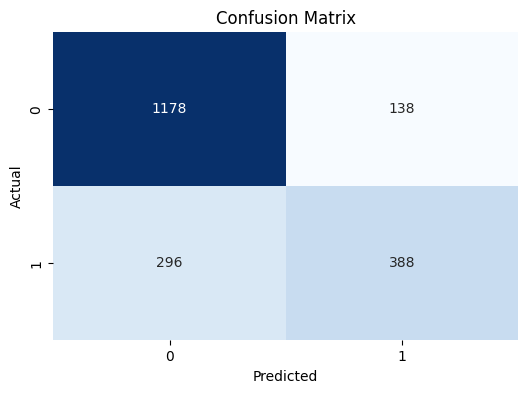

Sensitivity: 0.57
Specificity: 0.90
Misclassification Rate: 0.22


In [ ]:
# Part (A)

y_pred = logmodel.predict(x)

conf_matrix = confusion_matrix(y, y_pred)

tn, fp, fn, tp = conf_matrix.ravel()
sensitivity = tp / (tp + fn) # True Pos / Total Pos
specificity = tn / (tn + fp) # True Neg / Total Neg

misclassification_rate = 1- accuracy_score(y, y_pred)

plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

print(f"Sensitivity: {sensitivity:.2f}")
print(f"Specificity: {specificity:.2f}")
print(f"Misclassification Rate: {misclassification_rate:.2f}")

In [ ]:
# Part (B) - Full Model LOOCV Methodology

total_correct = 0
total_n = len(diabetes[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']])

for i in range(total_n):
    # Leave out the i-th data point for validation
    x_validation = x.iloc[i:i+1]
    y_validation = y.iloc[i:i+1]

    x_training = x.drop(index=i)
    y_training = y.drop(index=i)

    logmodel.fit(x_training, y_training)

    prediction = logmodel.predict(x_validation)

    if prediction[0] == y_validation.iloc[0]:
        total_correct += 1

# Calculate accuracy
accuracy = total_correct / total_n

print("Leave-One-Out Cross-Validation Accuracy:", 1 - accuracy)

Leave-One-Out Cross-Validation Accuracy: 0.21850000000000003


In [ ]:
# Part (C) - Verification of Part (B) Using LOOCV Package (Still Full Model)

loo = LeaveOneOut()

# Initialize variables to store results
total_correct = 0
total_samples = x.shape[0]

# Start LOOCV
for train_index, test_index in loo.split(x):
    x_training, x_validation = x.iloc[train_index], x.iloc[test_index]
    y_training, y_validation = y.iloc[train_index], y.iloc[test_index]

    logmodel.fit(x_training, y_training)
    prediction = logmodel.predict(x_validation)

    if prediction[0] == y_validation.iloc[0]:
        total_correct += 1

# Calculate accuracy
accuracy = total_correct / total_samples

# Print the accuracy
print("Leave-One-Out Cross-Validation Accuracy:", 1 - accuracy)

Leave-One-Out Cross-Validation Accuracy: 0.21850000000000003


In [ ]:
# TEST PART C

cv = LeaveOneOut()

scores = cross_val_score(logmodel, x, y, cv=cv)

print("Accuracy: %f" % (1 - np.mean(scores)))

KeyboardInterrupt: ignored

In [ ]:
# Part (D) - Estimate Test Error Rate using LOOCV

loo = LeaveOneOut()

total_correct = 0
total_samples = x.shape[0]

for train_index, test_index in loo.split(x):
    x_training, x_validation = x_reduced_train.iloc[train_index], x_reduced_train.iloc[test_index]
    y_training, y_validation = y_reduced_train.iloc[train_index], y_reduced_train.iloc[test_index]

    logmodel_reduced.fit(x_training, y_training)

    prediction = logmodel_reduced.predict(x_validation)

    if prediction[0] == y_validation.iloc[0]:
        total_correct += 1

# Calculate accuracy
accuracy = total_correct / total_samples

# Print the accuracy
print("Leave-One-Out Cross-Validation Accuracy:", 1 - accuracy)

Leave-One-Out Cross-Validation Accuracy: 0.21850000000000003


In [ ]:
# TEST PART D

cv = LeaveOneOut()

scores = cross_val_score(logmodel_reduced, x, y, cv=cv)

print("Accuracy: %f" % (1 - np.mean(scores)))

Accuracy: 0.218500


In [ ]:
# Part (E) - Use LDA

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import roc_curve, confusion_matrix, accuracy_score

loo = LeaveOneOut()

total_correct = 0
total_samples = x.shape[0]

for train_index, test_index in loo.split(x):
    x_training, x_validation = x.iloc[train_index], x.iloc[test_index]
    y_training, y_validation = y.iloc[train_index], y.iloc[test_index]

    # Initialize and train an LDA model
    lda = LinearDiscriminantAnalysis()
    lda.fit(x_training, y_training)

    # Use the LDA model to predict the validation data point
    prediction = lda.predict(x_validation)

    # Evaluate the prediction and update results
    if prediction[0] == y_validation.iloc[0]:
        total_correct += 1

# Calculate accuracy
accuracy = total_correct / total_samples

# Print the accuracy
print("Leave-One-Out Cross-Validation Accuracy:", 1 - accuracy)

Leave-One-Out Cross-Validation Accuracy: 0.22299999999999998


In [ ]:
# TEST PART E

cv = LeaveOneOut()

scores = cross_val_score(lda, x, y, cv=cv)

print("Accuracy: %f" % (1 - np.mean(scores)))

Accuracy: 0.223000


In [ ]:
# Part (F) - Use QDA

from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.metrics import roc_curve, confusion_matrix, accuracy_score

loo = LeaveOneOut()

total_correct = 0
total_samples = x.shape[0]

for train_index, test_index in loo.split(x):
    x_training, x_validation = x.iloc[train_index], x.iloc[test_index]
    y_training, y_validation = y.iloc[train_index], y.iloc[test_index]

    qda = QuadraticDiscriminantAnalysis()
    qda.fit(x_training, y_training)
    prediction = qda.predict(x_validation)

    if prediction[0] == y_validation.iloc[0]:
        total_correct += 1

# Calculate accuracy
accuracy = total_correct / total_samples

# Print the accuracy
print("Leave-One-Out Cross-Validation Accuracy:", 1 - accuracy)

Leave-One-Out Cross-Validation Accuracy: 0.24450000000000005


In [ ]:
# TEST PART F

cv = LeaveOneOut()

scores = cross_val_score(qda, x, y, cv=cv)

print("Accuracy: %f" % (1 - np.mean(scores)))

Accuracy: 0.244500


In [ ]:
# Part (G) - Use KNN

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import LeaveOneOut
from sklearn.metrics import accuracy_score

x_train = diabetes[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']]
y_train = diabetes['Outcome']

loo = LeaveOneOut()

ks = np.arange(1,21,5)

best_k = None
best_loocv_error_rate = float('inf')

for k in ks:
    total_error = 0
    n_iterations = 0

    knn = KNeighborsClassifier(n_neighbors=k)

    for train_index, test_index in loo.split(x_train):
        x_train_fold, x_validation = x_train.iloc[train_index], x_train.iloc[test_index]
        y_train_fold, y_validation = y_train.iloc[train_index], y_train.iloc[test_index]

        knn.fit(x_train_fold, y_train_fold)
        y_pred = knn.predict(x_validation)

        accuracy = accuracy_score(y_validation, y_pred)
        total_error += 1 - accuracy
        n_iterations += 1

    loocv_error_rate = total_error / n_iterations

    if loocv_error_rate < best_loocv_error_rate:
        best_k = k
        best_loocv_error_rate = loocv_error_rate

print(f"Optimal k: {best_k}")
print(f"Estimated Test Error Rate (LOOCV) with k-NN: {best_loocv_error_rate}")

Optimal k: 1
Estimated Test Error Rate (LOOCV) with k-NN: 0.0015


In [ ]:
cv = LeaveOneOut()

optimal_knn = KNeighborsClassifier(best_k)

scores = cross_val_score(optimal_knn, x, y, cv=cv)

print(best_k)
print(scores)

2
[1. 1. 1. ... 1. 1. 1.]


In [ ]:
# Question 3

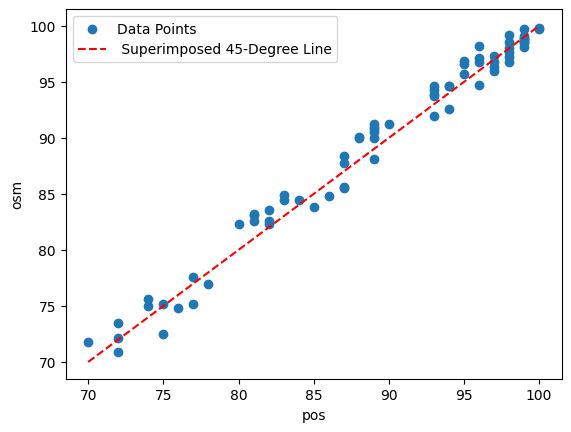

IQR: 1.0
Q1: 0.5999999999999943
Q2 (Median): 1.0499999999999972
Q3: 1.5999999999999943


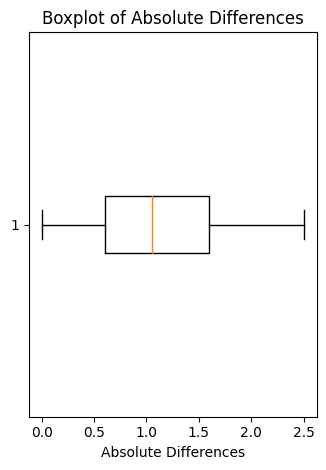

In [ ]:
# Part (A)

# Plot regular points
plt.scatter(oxygen['pos'], oxygen['osm'], label = 'Data Points')

x_min, x_max = oxygen['pos'].min(), oxygen['pos'].max()
y_min, y_max = oxygen['osm'].min(), oxygen['osm'].max()

line_x = [x_min, x_max]
line_y = [x_min, x_max]

# Plot the 45-degree line
plt.plot(line_x, line_y, color='red', linestyle='--', label=' Superimposed 45-Degree Line')

plt.xlabel('pos')
plt.ylabel('osm')
plt.legend()

plt.show()

# Boxplot
plt.subplot(1, 2, 2)
oxygen['Absolute_Differences'] = np.abs(oxygen['pos'] - oxygen['osm'])
plt.boxplot(oxygen['Absolute_Differences'], vert=False)
plt.xlabel('Absolute Differences')
plt.title('Boxplot of Absolute Differences')

plt.tight_layout()

q1 = oxygen['Absolute_Differences'].quantile(0.25)
q2 = oxygen['Absolute_Differences'].median()
q3 = oxygen['Absolute_Differences'].quantile(0.75)
iqr = q3 - q1


print("IQR:", iqr)
print("Q1:", q1)
print("Q2 (Median):", q2)
print("Q3:", q3)

plt.show()

In [ ]:
# Part (B)

oxygen = pd.DataFrame(oxygen)

oxygen['Absolute_Differences'] = np.abs(oxygen['pos'] - oxygen['osm'])

theta = oxygen['Absolute_Differences'].quantile(0.9)
print(f'θ: {theta}')

θ: 2.0


In [ ]:
# Part (C)

theta = oxygen['Absolute_Differences'].quantile(0.9)
print(f'θ: {theta}')

θ: 2.0


In [ ]:
# Part (D)

import numpy as np

data = oxygen['Absolute_Differences']

num_samples = 1000
sample_size = len(oxygen)
original_mean = np.mean(data)

means = []

for num in range(num_samples):
  bootstrap_sample = np.random.choice(data, size = sample_size, replace = True)

  sample_mean = np.mean(bootstrap_sample)
  means.append(sample_mean)

bias = original_mean - np.mean(means)
standard_error = np.std(means, ddof=1)
confidence_interval = np.percentile(means, [5.0, 95.0])

print(confidence_interval)
print(bias)
print(standard_error)

[0.96944444 1.21673611]
0.0010444444444444034
0.07449699525687131


In [ ]:
# Part (E) - Verification of Personal Bootstrap

import numpy as np
from mlxtend.evaluate import bootstrap

# Convert the list to a NumPy array
data = np.array(data)

# Specify the number of resamples and the statistic of interest (mean)
n_resamples = 1000

# Perform bootstrapping
results = bootstrap(data, num_rounds=n_resamples, func=np.mean)

# Access the results
mean = results[0]
conf_int = [results[1], results[2]]

std_error_of_mean = np.std(results[0], ddof=1)

# Calculate the width of the confidence interval
confidence_interval_width = conf_int[1] - conf_int[0]

# Calculate the total standard error by adding them together
total_standard_error = std_error_of_mean + confidence_interval_width
print("Mean:", mean)
print("Confidence Interval:", conf_int)
print("Standard Error of the Mean:", std_error_of_mean)
print("Confidence Interval Width:", confidence_interval_width)
print("Total Standard Error:", total_standard_error)

Mean: 5.9
Confidence Interval: [0.7637046695695413, (4.45, 7.35)]
Standard Error of the Mean: nan
Confidence Interval Width: [3.68629533 6.58629533]
Total Standard Error: [nan nan]


/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:265: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:257: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
